# Histograms, Binning, and Density

A simple histogram can be a great first stepd in understanding a dataset. Earlier, we saw a preview of Matplotlb's histogram function, which creates a basic histogram in one line, once the normal boilerplate imports are done:

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

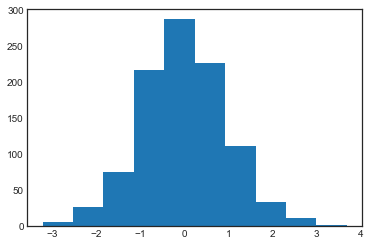

In [6]:
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more custumized histogram:

The `hist()` function has many options to tune both the calculation and the display; here's an example of a more customized histogram:

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.00867277, 0.00433639, 0.01300916, 0.01300916, 0.03469108,
        0.06938217, 0.07805494, 0.12141879, 0.13009156, 0.26451951,
        0.36425638, 0.31221975, 0.39027469, 0.42062939, 0.43797493,
        0.32089252, 0.32522891, 0.33823806, 0.19080096, 0.14310072,
        0.1474371 , 0.09973686, 0.0303547 , 0.01734554, 0.03469108,
        0.00867277, 0.00867277, 0.00433639, 0.        , 0.00433639]),
 array([-3.22889210e+00, -2.99828530e+00, -2.76767849e+00, -2.53707168e+00,
        -2.30646488e+00, -2.07585807e+00, -1.84525126e+00, -1.61464445e+00,
        -1.38403765e+00, -1.15343084e+00, -9.22824031e-01, -6.92217224e-01,
        -4.61610417e-01, -2.31003609e-01, -3.96801945e-04,  2.30210005e-01,
         4.60816813e-01,  6.91423620e-01,  9.22030427e-01,  1.15263723e+00,
         1.38324404e+00,  1.61385085e+00,  1.84445766e+00,  2.07506446e+00,
         2.30567127e+00,  2.53627808e+00,  2.76688489e+00,  2.99749169e+00,
         3.22809850e+00,  3.45870531e+00,  3.68931212e+00]

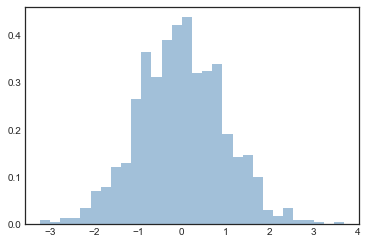

In [7]:
plt.hist(data, bins=30,normed=True,alpha=0.5,
        histtype='stepfilled',color='steelblue',
        edgecolor='none')

The `plt.hist` docstring has more information on oher customization options available. I find thsi combination of `histtype='stepfilled'` along withsome transparency `aplpha` to be very useful whem comparing histograms of several distributions:

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


(array([0.01016834, 0.00677889, 0.        , 0.01016834, 0.02711557,
        0.03050501, 0.02372612, 0.03050501, 0.0813467 , 0.06439947,
        0.09829393, 0.05423114, 0.10507283, 0.14913562, 0.17625119,
        0.15252507, 0.16269341, 0.18303008, 0.23387177, 0.23387177,
        0.20675621, 0.23048233, 0.16269341, 0.18980898, 0.15591452,
        0.1254095 , 0.11185172, 0.0881256 , 0.07117837, 0.06778892,
        0.03728391, 0.02372612, 0.02033668, 0.02033668, 0.02033668,
        0.00677889, 0.00338945, 0.00338945, 0.00338945, 0.00677889]),
 array([-2.79898641, -2.50395294, -2.20891947, -1.91388601, -1.61885254,
        -1.32381907, -1.02878561, -0.73375214, -0.43871867, -0.14368521,
         0.15134826,  0.44638173,  0.7414152 ,  1.03644866,  1.33148213,
         1.6265156 ,  1.92154906,  2.21658253,  2.511616  ,  2.80664946,
         3.10168293,  3.3967164 ,  3.69174986,  3.98678333,  4.2818168 ,
         4.57685027,  4.87188373,  5.1669172 ,  5.46195067,  5.75698413,
         6.05201

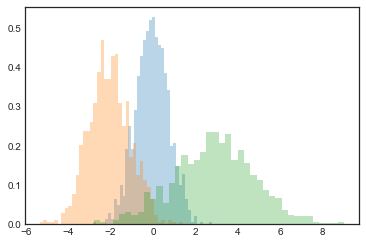

In [8]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled',alpha=0.3,normed=True, bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available.

In [10]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 33 293 515 145  14]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can cerate histograms in two dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data - an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [12]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

### `plt.hist2d`: Two-dimensional histogram

One starightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function:

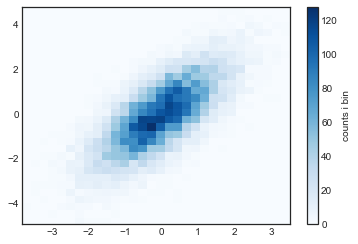

In [13]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts i bin')